# Birth-death process simulaiton

### Simple population, growth, and decay model

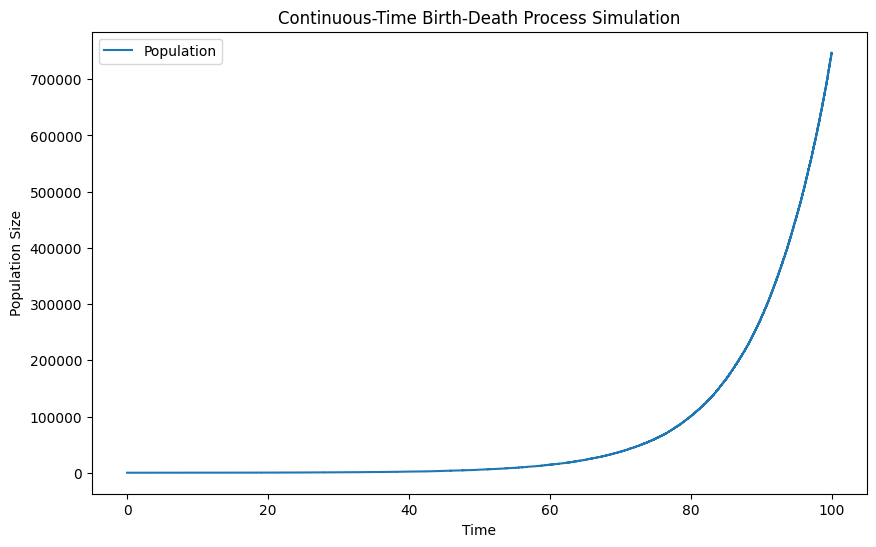

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_rate = 0.6  # Birth rate per individual
mu_rate = 0.5      # Death rate per individual
initial_population = 10  # Starting population
max_time = 100.0     # Maximum simulation time

# Initialize variables
population = initial_population
time = 0.0
time_history = [time]
population_history = [population]

# Simulation loop
while time < max_time and population > 0:
    # Total rate for any event to happen (birth or death)
    total_rate = lambda_rate * population + mu_rate * population
    # Draw the time to the next event from an exponential distribution
    time_to_next_event = np.random.exponential(1 / total_rate)
    time += time_to_next_event
    
    # Determine if the event is a birth or a death
    p = np.random.rand()
    if p < (lambda_rate * population) / total_rate:
        population += 1  # Birth
    else:
        population -= 1  # Death, ensuring it doesn't drop below zero

    # Record time and population
    time_history.append(time)
    population_history.append(population)

# Plot results
plt.figure(figsize=(10, 6))
plt.step(time_history, population_history, where="post", label='Population')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Continuous-Time Birth-Death Process Simulation')
plt.legend()
plt.show()


### Two states: child and adult

Ok for a classical linear birth death process.
Now, let's consider a population with two states : child and adult. Adults are giving birth to child, and children are growing up to become adults. Adults are dying with a certain rate, and children are dying with another rate.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
birth = 0.35  # Birth rate per adult
puberty = 0.8      # transition rate from child to adult
child_death = 0.2     # Death rate per child
adult_death = 0.5     # Death rate per adult
init_child = 5  # Starting child population
init_adult = 5  # Starting adult population
max_time = 100.0     # Maximum simulation time

# Initialize variables
child_pop = init_child
adult_pop = init_adult
time = 0.0
time_history = [time]
population_history = [(child_pop, adult_pop)]

# Simulation loop
while time < max_time and ( child_pop + adult_pop  > 0):
    # Total rate for any event to happen (birth or death)
    total_rate = birth * adult_pop + puberty * child_pop + child_death * child_pop + adult_death * adult_pop
    # Draw the time to the next event from an exponential distribution
    time_to_next_event = np.random.exponential(1 / total_rate)
    time += time_to_next_event
    
    # Determine the event that will happen
    p = np.random.rand()
    # Birth
    if p < (birth * adult_pop) / total_rate:
        child_pop += 1

    # Puberty
    elif p < (puberty * child_pop + birth * adult_pop) / total_rate and child_pop > 0:
        child_pop -= 1
        adult_pop += 1

    # Child death
    elif p < (child_death * child_pop + puberty * child_pop + birth * adult_pop) / total_rate and child_pop > 0:
        child_pop -= 1

    # Adult death
    else:
        adult_pop -= 1

    # Record time and population
    time_history.append(time)
    population_history.append((child_pop, adult_pop))

# Plot results
plt.figure(figsize=(10, 6))
plt.step(time_history, population_history, where="post", label = ['Children', 'Adults'])
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Continuous-Time Birth-Death Process Simulation')
plt.legend()
plt.show()


### Three states: child, male and female

Ok nice, now let's simulate a similar process with a bit more complexity : adulthood with two states, male and female.

In [ ]:
# We introduce a mating rate, depending on the number of males

def mating(M):
    return M / (1 + M)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
birth = 0.5  # Birth rate per adult
puberty = 0.8      # transition rate from child to adult
mu = 0.5    # rate at which child becomes a female
child_death = 0.2     # Death rate per child
adult_death = 0.2     # Death rate per adult
init_child = 100  # Starting child population
init_female = 100 # Starting female population
init_male = 5 # Starting adult population
max_time = 500.0     # Maximum simulation time

# Initialize variables
child_pop = init_child
male_pop = init_male
female_pop = init_female
time = 0.0
time_history = [time]
population_history = [(child_pop, male_pop, female_pop)]

# Simulation loop
while time < max_time and ( child_pop + male_pop + female_pop > 0):
    # Total rate for any event to happen (birth or death)
    total_rate = birth * mating(male_pop) * female_pop + child_death * child_pop + adult_death * male_pop + adult_death * female_pop + mu * puberty * child_pop + (1-mu) * puberty * child_pop
    # Draw the time to the next event from an exponential distribution
    time_to_next_event = np.random.exponential(1 / total_rate)
    time += time_to_next_event
    
    # Determine the event that will happen
    p = np.random.rand()
    # Birth
    if p < (birth * mating(male_pop) * female_pop) / total_rate:
        child_pop += 1

    # Transition to female
    elif p < (puberty * mu * child_pop + birth * mating(male_pop) * female_pop) / total_rate and child_pop > 0:
        child_pop -= 1
        female_pop += 1

    # Transition to male
    elif p < (puberty * (1 - mu) * child_pop + puberty * mu * child_pop + birth * mating(male_pop) * female_pop) / total_rate and child_pop > 0:
        child_pop -= 1
        male_pop += 1

    # Child death
    elif p < ( child_death * child_pop + puberty * (1 - mu) * child_pop + puberty * mu * child_pop + birth * mating(male_pop) * female_pop) / total_rate and child_pop > 0:
        child_pop -= 1

    # Adult death
    elif p < (adult_death * female_pop + child_death * child_pop + puberty * (1 - mu) * child_pop + puberty * mu * child_pop + birth * mating(male_pop) * female_pop) / total_rate:
        female_pop -= 1

    else:
        male_pop -= 1

    # Record time and population
    time_history.append(time)
    population_history.append((child_pop, male_pop, female_pop))

# Plot results
plt.figure(figsize=(10, 6))
plt.step(time_history, population_history, where="post", label = ['Children', 'Male', 'Female'])
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Continuous-Time Birth-Death Process Simulation')
plt.legend()
plt.show()
